In [5]:
#Importing the Required Libraries and the required Dataset
from sklearn.datasets import fetch_20newsgroups
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.naive_bayes import MultinomialNB

In [6]:
news_categories = fetch_20newsgroups()

In [7]:
#Importing the stopwords and adding more stopwords to make the algorithm work better 
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
punctuations=list(string.punctuation)
stop_words.update(punctuations)
news_categories.keys()

[nltk_data] Downloading package stopwords to C:\Users\Ajay
[nltk_data]     Singhal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [9]:
stopwords_extra = np.loadtxt('stopwords.txt',dtype=str,delimiter=" ")
stop_words.update(stopwords_extra)

In [10]:
len(stop_words)

876

In [11]:
all_document = news_categories.data
all_categories = news_categories.target

In [12]:
#Importing Punctuations
import nltk
nltk.download('punkt')
all_document_usable = [word_tokenize(doc) for doc in all_document]

[nltk_data] Downloading package punkt to C:\Users\Ajay
[nltk_data]     Singhal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
x_train, x_test, y_train, y_test=train_test_split(all_document_usable, all_categories, random_state=1)

In [14]:
all_words_doc = []
for doc in x_train:
    for word in doc:
        if (word.lower() not in stop_words) and len(word)!=1 and len(word)!=2 and word[0]!="'" and word!="n't" and word[0]!=".":
            all_words_doc.append(word)

In [15]:
freq_all_words = {}
for i in all_words_doc:
    if(i not in freq_all_words):
        freq_all_words[i] = 1
    else:
        freq_all_words[i] = freq_all_words[i] + 1    

In [16]:
import numpy as np
freq=np.array([i for i in freq_all_words.values()])
words=np.array([i for i in freq_all_words.keys()])

In [17]:
words=words[np.argsort(freq)][::-1]
freq=np.sort(freq)[::-1]

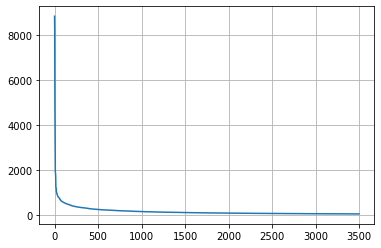

In [25]:
import matplotlib.pyplot as plt
plt.plot(np.arange(len(freq))[0:3498],freq[0:3498])
plt.grid()
plt.xlabel('Nth Word')
plt.ylabel('Frequency of Nth Word ')

In [150]:
#selecting features for usage in algorithm
features = words[100:10000]

In [151]:
#Defining a function which converts the dataset into a format which segreggates the words in a doc into different features and measures the frequency of those features
def converter(x_data,n_features):
    final_answer = np.zeros((len(x_data),len(n_features)))
    for i in range(len(x_data)):
        current_doc = x_data[i]
        d = dict()
        for word in current_doc:
            if(word in d):
                d[word] = d[word] + 1
            else:
                d[word] = 1
        for j in range(len(n_features)):
            if n_features[j] in d.keys():
                final_answer[i][j] = d[n_features[j]]
            else:
                continue
    return final_answer

In [152]:
X_train = converter(x_train,features)

In [153]:
X_test = converter(x_test,features)

In [154]:
clf=MultinomialNB()
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)
clf.score(X_test,y_test)

0.8635560268646165

### The Result of the InBuilt Multinomial Naive Bayes is 86%

# Generic Naive Bayes Implementation

In [209]:
#Defining the fit function which gives us the dictionary to proceed further
def fit_new(x_train, y_train):
    count=dict()
    for i in range(20):
        needed_docs=x_train[y_train==i]
        count[i]=dict()
        count[i]['total']=0
        for j in range(len(features)):
            count[i][features[j]]=needed_docs[:, j].sum()
            count[i]['total']+=count[i][features[j]]
    return count

In [210]:
fit_new(X_train,y_train)

{0: {'total': 23510.0,
  'local': 14.0,
  'book': 76.0,
  'email': 9.0,
  'source': 10.0,
  'April': 9.0,
  'answer': 41.0,
  'Internet': 1.0,
  'usa': 2.0,
  'Institute': 53.0,
  'running': 4.0,
  'told': 13.0,
  'B8F': 0.0,
  'gun': 4.0,
  'standard': 14.0,
  'Technology': 57.0,
  'mail': 9.0,
  'Bill': 54.0,
  'National': 4.0,
  'questions': 33.0,
  'issue': 45.0,
  'children': 18.0,
  'buy': 2.0,
  'Paul': 6.0,
  'disk': 0.0,
  'Department': 15.0,
  'matter': 45.0,
  'posting': 59.0,
  'speed': 1.0,
  'Canada': 8.0,
  'address': 10.0,
  'President': 4.0,
  'Robert': 56.0,
  'days': 13.0,
  'live': 33.0,
  'Article-I.D': 4.0,
  'machine': 3.0,
  'pretty': 26.0,
  'agree': 63.0,
  'server': 2.0,
  'stuff': 24.0,
  'Systems': 2.0,
  'feel': 38.0,
  'word': 51.0,
  'access': 7.0,
  'Mike': 16.0,
  'memory': 10.0,
  'claim': 104.0,
  'including': 15.0,
  'California': 54.0,
  'computer': 4.0,
  'Mac': 0.0,
  'DOS': 1.0,
  'package': 0.0,
  'rights': 26.0,
  'started': 18.0,
  'provide':

In [219]:
#Defining the Probability function
def probability(dict_answer,x,class_under_study):
    final_answer = 0
    for i in range(len(x)):
        if x[i]!=0:
            numerator=dict_answer[class_under_study][features[i]]
            denominator=dict_answer[class_under_study]['total']
            final_answer = final_answer + np.log(numerator+1/(denominator+len(x)))
    return final_answer

In [212]:
#Defining the prediction of a single row of the dataset
def predictsinglept(dict_answer,x):
    best_p = -1000
    best_class = -1
    classes = dict_answer.keys()
    for current_class in classes:
        p_probab = probability(dict_answer,x,current_class)
        if(p_probab>best_p):
            best_p = p_probab
            best_class = current_class
    return best_class       

In [213]:
#Defining the prediction of the entire dataset
def predict(x_test, dict_answer):
    y_pred=[]
    for doc in x_test:
        y_pred.append(predictsinglept(dict_answer, doc))
    return y_pred

In [215]:
dict_answer = fit_new(X_train,y_train)

In [220]:
y_predicted = predict(X_test,dict_answer)

In [221]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=y_predicted)) 

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       114
           1       0.73      0.62      0.67       152
           2       0.85      0.67      0.75       139
           3       0.78      0.68      0.73       152
           4       0.86      0.77      0.81       138
           5       0.67      0.90      0.77       153
           6       0.82      0.54      0.65       147
           7       0.87      0.82      0.85       137
           8       0.91      0.87      0.89       131
           9       0.98      0.87      0.92       135
          10       0.91      0.97      0.94       136
          11       0.71      0.99      0.83       145
          12       0.81      0.65      0.72       157
          13       0.81      0.95      0.88       151
          14       0.82      0.93      0.87       155
          15       0.82      0.92      0.87       159
          16       0.77      0.93      0.84       140
          17       0.90    

### The accuracy achieved from the Generic implemantation is 82%. We can see that accuracy is higher for certain classes and less for some others. This could be due to the presencse of some stopwords. To improve the accuracy, we can manually work on the features and by forming pairs to see which features effect the dataset more and which are irrevelant to the result. 

### The result is very close to that obtained by the inbuilt function, we can further improve the accuracy by following above mentioned steps upto 90%.